In [1]:
import numpy as np
import scipy.stats as sts
hhlds=np.loadtxt('clms.txt')#hhlds=household claims
print(hhlds)

[ 361.65  123.04  541.77 ...,   97.43  186.88  119.19]


In [3]:
average_1=np.average(hhlds)
print(average_1)

720.277975327


In [4]:
median_1=np.median(hhlds)
print(median_1)

172.21


In [5]:
maximum_1=max(hhlds)
minimum_1=min(hhlds)
print(maximum_1)
print(minimum_1)

227967.25
0.01


In [6]:
stdev_1=np.std(hhlds)
print(stdev_1)

3972.66375639


<IPython.core.display.Javascript object>


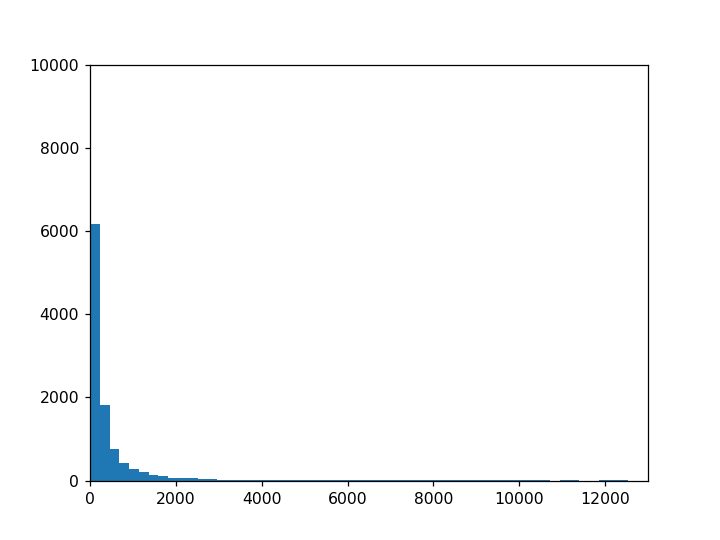

In [7]:
#A simple Bar chart with the data
import matplotlib.pyplot as plt
%matplotlib notebook
plt.hist(hhlds,1000)
plt.ylim(0,10000)
plt.xlim(0,13000)
plt.show()

<IPython.core.display.Javascript object>


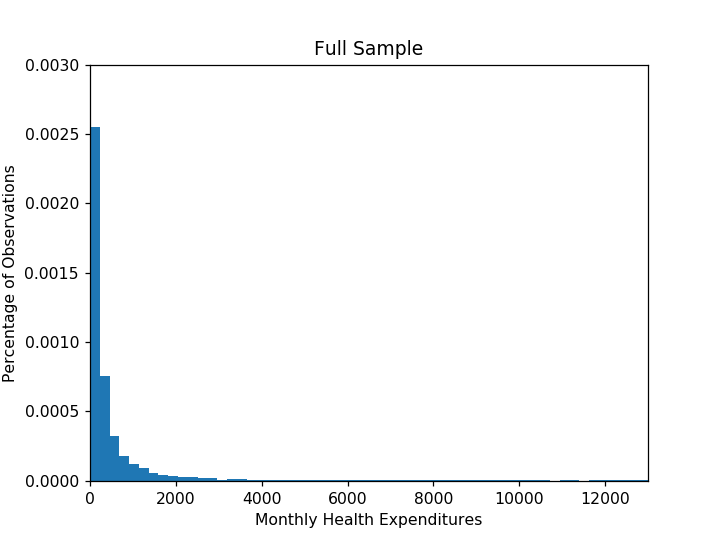

1.0000000000000002

In [8]:
# A histogram with all the data
import matplotlib.pyplot as plt
%matplotlib notebook
counts,bins,ignored=plt.hist(hhlds,1000,normed=1)
plt.title('Full Sample')
plt.xlabel('Monthly Health Expenditures')
plt.ylabel('Percentage of Observations')
plt.ylim(0,0.003)
plt.xlim(0,13000)
plt.show()
np.sum(counts * np.diff(bins))#Test that the area of the histogram sums to 1

In [9]:
#I Select only the households with amounts less than 800.
hhlds2=hhlds[hhlds<800]

<IPython.core.display.Javascript object>


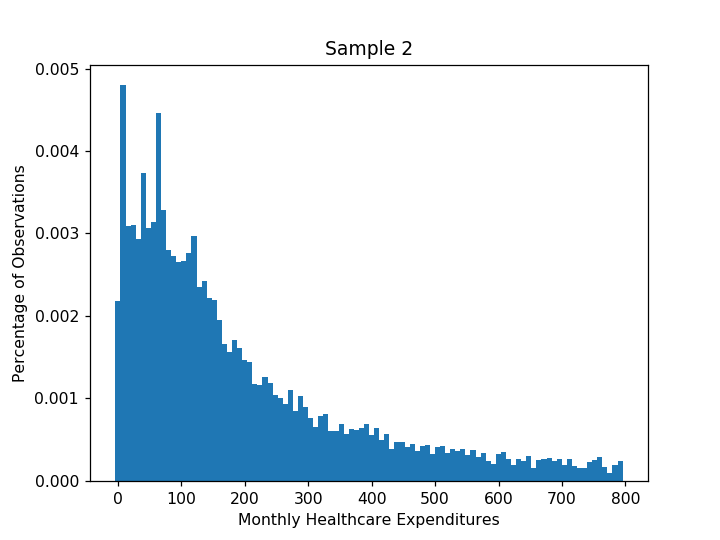

0.84942099999999998

In [10]:
#We know that the number of households with amounts up to 800 are 9020. so they are the 9020/10619=0.85 of the full sample roughly.
#So our truncated histogram
#will add up to 0.85 and not to one.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
normed_value =0.849421
hist, bins = np.histogram(hhlds2, bins=100, density=True)
widths = np.diff(bins)
hist *= normed_value
plt.bar(bins[:-1], hist, widths)
plt.xlabel('Monthly Healthcare Expenditures')
plt.ylabel('Percentage of Observations')
plt.title('Sample 2')
plt.show()

Total=np.sum(hist * widths)#Test that the area sum to 0.85
Total

In [11]:
#Calculation of Initial Guesses using the full sample
beta_init_1=stdev_1**2/average_1
alpha_init_1=average_1/beta_init_1
print(beta_init_1)
print(alpha_init_1)

21911.0647028
0.0328727966942


In [12]:
#St.Dev and Variance of second (truncated) sample
stdev_2=np.std(hhlds2)
variance_2=stdev_2**2
print('stdev_2=',stdev_2)
print('variance_2=',variance_2)

stdev_2= 182.83484557
variance_2= 33428.5807546


In [13]:
#define Gamma PDF with parameters alpha and beta
import numpy as np
import scipy as sp
from scipy import special
def gamma_pdf(xvals,alpha,beta):
    pdf_vals=(((xvals**(alpha-1))*np.exp(-(xvals/beta)))/((beta**alpha)*(sp.special.gamma(alpha))))
    vals=pdf_vals
    return vals

In [14]:
#define Log Likelihood function of Gamma
def log_lik_gamma(xvals,alpha,beta):
    pdf_vals=gamma_pdf(xvals,alpha,beta)
    ln_pdf_vals=np.log(pdf_vals)
    log_lik_val=ln_pdf_vals.sum()
    return log_lik_val

In [15]:
#Criterion
def crit(params, *args):
    alpha,beta=params
    xvals=args
    log_lik_val=log_lik_gamma(xvals,alpha,beta)
    neg_lok_lik_val=-log_lik_val
    return neg_lok_lik_val


In [16]:
#I use the initial guesses for the full sample to estimate the partial data
import scipy.optimize as opt
from scipy.optimize import minimize
bounds=((0,None),(0,None))# I have to put bounds for the alpha and beta since they must remain positive
params_init = np.array([alpha_init_1, beta_init_1])
mle_args=(hhlds2)
results=opt.minimize(crit, params_init, args=(mle_args),bounds=bounds)
alpha_MLE, beta_MLE = results.x
loglikelihoodgamma=log_lik_gamma(hhlds2,alpha_MLE,beta_MLE)
print('alpha_MLE=', alpha_MLE, ' beta_MLE=', beta_MLE)
print('log likelihood gamma=',loglikelihoodgamma)

alpha_MLE= 0.203488640934  beta_MLE= 21911.0646997
log likelihood gamma= -66464.9911209


In [17]:
results

      fun: 66464.991120864812
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01309672,  0.08003553])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.03488641e-01,   2.19110647e+04])

<IPython.core.display.Javascript object>


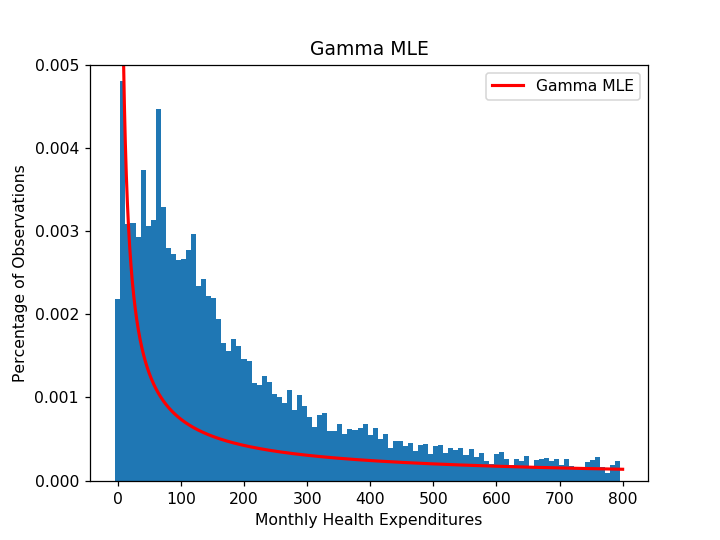

In [18]:
#Plot with the histogram of the truncated data and the estimated Gamma PDF with the initial guesses from the full sample.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
normed_value =0.849421
hist, bins = np.histogram(hhlds2, bins=100, density=True)
widths = np.diff(bins)
hist *= normed_value
plt.bar(bins[:-1], hist, widths)

plt.plot(np.linspace(0,800,9020), gamma_pdf(np.linspace(0.01,800,9020),alpha_MLE, beta_MLE),linewidth=2, color='r', label='Gamma MLE')
plt.legend(loc='upper right')
plt.ylim(0,0.005)
plt.title('Gamma MLE')
plt.xlabel('Monthly Health Expenditures')
plt.ylabel('Percentage of Observations')
plt.show()


In [22]:
#define Generalized Gamma Function
import numpy as np
import scipy as sp
from scipy import special
import scipy.special as spc
def gen_gamma_pdf(xvals,alpha,beta,mu):
    pdf_vals=mu*xvals**(alpha-1)*np.exp(-(xvals/beta)**mu)/(beta**alpha*spc.gamma(alpha/mu))
    return pdf_vals


In [23]:
#define Log Likelihood function for Generalized Gamma 
def log_lik_gen_gamma(xvals,alpha,beta,mu):
    pdf_vals=gen_gamma_pdf(xvals,alpha,beta,mu)
    ln_pdf_vals=np.log(pdf_vals)
    log_lik_val=ln_pdf_vals.sum()
    return log_lik_val

In [24]:
def crit_gen_gamma(params, *args):
    alpha,beta,mu=params
    xvals=args
    log_lik_val=log_lik_gen_gamma(xvals,alpha,beta,mu)
    neg_lok_lik_val=-log_lik_val
    return neg_lok_lik_val

In [25]:
import scipy.optimize as opt
from scipy.optimize import minimize
bounds=((1e-10,None),(1e-10,None),(1e-10,None))# I have to put bounds for the alpha, beta and mu since they must remain positive
mu_init=1

params_init_gg = np.array([alpha_MLE, beta_MLE,mu_init])

mle_args=(hhlds2)

results=opt.minimize(crit_gen_gamma, params_init_gg, args=(mle_args),bounds=bounds)

alpha_MLE_gg, beta_MLE_gg, mu_MLE_gg = results.x

loglikelihoodgengamma=log_lik_gen_gamma(hhlds2,alpha_MLE_gg,beta_MLE_gg,mu_MLE_gg)

print('alpha_MLE_gg=', alpha_MLE_gg, ' beta_MLE_gg=', beta_MLE_gg,'mu_MLE_gg=',mu_MLE_gg)
print('LogLikelihood Generalized Gamma=',loglikelihoodgengamma)

alpha_MLE_gg= 0.203485168241  beta_MLE_gg= 21911.0556344 mu_MLE_gg= 0.886895600622
LogLikelihood Generalized Gamma= -66454.3457611


<IPython.core.display.Javascript object>


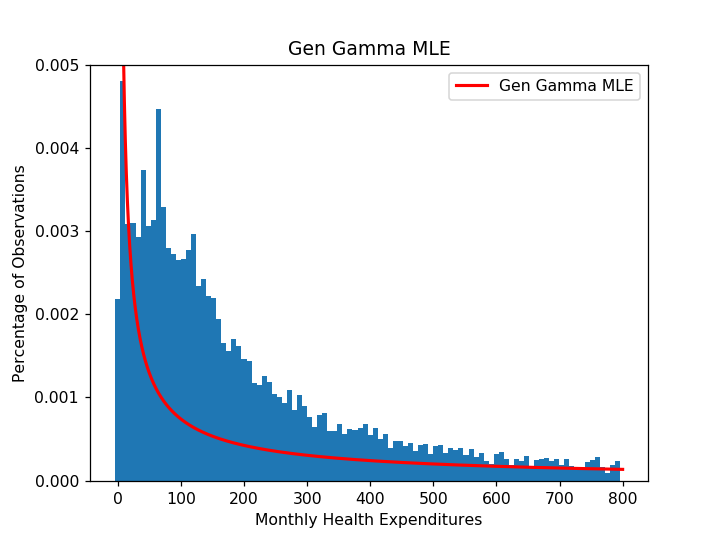

In [26]:
#Plot the data with the Generalized Gamma PDF that we estimated
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
normed_value =0.849421
hist, bins = np.histogram(hhlds2, bins=100, density=True)
widths = np.diff(bins)
hist *= normed_value
plt.bar(bins[:-1], hist, widths)

plt.plot(np.linspace(0,800,9020), gen_gamma_pdf(np.linspace(0.01,800,9020),alpha_MLE_gg, beta_MLE_gg,mu_MLE_gg),linewidth=2, color='r', label='Gen Gamma MLE')
plt.legend(loc='upper right')
plt.ylim(0,0.005)
plt.title('Gen Gamma MLE')
plt.xlabel('Monthly Health Expenditures')
plt.ylabel('Percentage of Observations')
plt.show()

In [33]:
#Define Generalized Beta PDF
def gen_beta_pdf(xvals,a,b,p,q):
    pdf_vals=a*xvals**((a*p)-1)/(b**(a*p)*sp.special.beta(p,q)*(1+(xvals/b)**a)**(p+q))
    return pdf_vals

In [34]:
#Define Log Likelihood Function for Generalized Beta 
def log_lik_gen_beta(xvals,a,b,p,q):
    pdf_vals=gen_beta_pdf(xvals,a,b,p,q)
    log_pdf_vals=np.log(pdf_vals)
    log_lik_val=log_pdf_vals.sum()
    return log_lik_val

In [35]:
def crit_gen_beta(params,*args):
    a,b,p,q=params
    xvals=args
    log_lik_val=log_lik_gen_beta(xvals,a,b,p,q)
    neg_log_lik_val=-log_lik_val
    return neg_log_lik_val

In [36]:
import scipy.optimize as opt
from scipy.optimize import minimize
bounds=((1e-10,None),(1e-10,None),(1e-10,None),(1e-10,None))# I have to put bounds for the alpha, beta and mu since they must remain positive

q_init=10000
a_init=mu_MLE_gg
b_init = (q_init**(1/a_init))*beta_MLE_gg
p_init=alpha_MLE_gg/a_init
params_init_gen_beta = np.array([a_init,b_init,p_init,q_init])

mle_args=(hhlds2)

results=opt.minimize(crit_gen_beta, params_init_gen_beta, args=(mle_args),bounds=bounds)

a_MLE_gen_beta, b_MLE_gen_beta, p_MLE_gen_beta,q_MLE_gen_beta = results.x

loglikelihoodgenbeta=log_lik_gen_beta(hhlds2,a_MLE_gen_beta, b_MLE_gen_beta, p_MLE_gen_beta,q_MLE_gen_beta)

print('a_MLE_gen_beta=', a_MLE_gen_beta, 'b_MLE_gen_beta=', b_MLE_gen_beta,'p_MLE_gen_beta=',p_MLE_gen_beta,'q_MLE_gen_beta=',q_MLE_gen_beta)
print('LogLikelihood Generalized Beta=',loglikelihoodgenbeta)

a_MLE_gen_beta= 0.522209801318 b_MLE_gen_beta= 709213514.719 p_MLE_gen_beta= 3.40827837439 q_MLE_gen_beta= 9999.97947377
LogLikelihood Generalized Beta= -56809.1107825


<IPython.core.display.Javascript object>


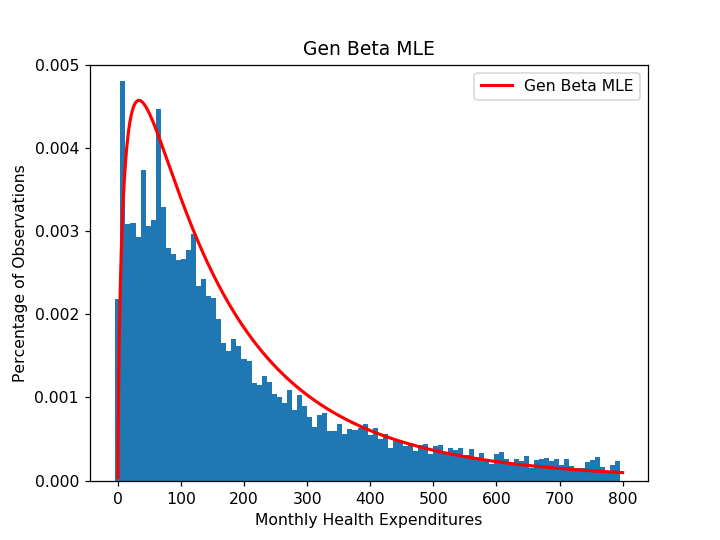

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
normed_value =0.849421
hist, bins = np.histogram(hhlds2, bins=100, density=True)
widths = np.diff(bins)
hist *= normed_value
plt.bar(bins[:-1], hist, widths)

plt.plot(np.linspace(0,800,9020), gen_beta_pdf(np.linspace(0.01,800,9020),a_MLE_gen_beta, b_MLE_gen_beta,p_MLE_gen_beta,q_MLE_gen_beta),linewidth=2, color='r', label='Gen Beta MLE')
plt.legend(loc='upper right')
plt.ylim(0,0.005)
plt.title('Gen Beta MLE')
plt.xlabel('Monthly Health Expenditures')
plt.ylabel('Percentage of Observations')
plt.show()

In [38]:
#Likelihood Test
# A. Gamma Vs Generalized beta
LRval_1=2*(loglikelihoodgenbeta-loglikelihoodgamma)# H0:Gamma H1:Gen Beta
pvalgamma=1.0-sts.chi2.cdf(LRval_1, 4)
print('P-Value for Gamma=',pvalgamma)

P-Value for Gamma= 0.0


In [39]:
#Likelihood Test
# A. Geneneralized Gamma Vs Generalized beta
LRval_2=2*(loglikelihoodgenbeta-loglikelihoodgengamma)# H0:Gen Gamma H1:Gen Beta
pvalgengamma=1.0-sts.chi2.cdf(LRval_2, 4)
print('P-Value for Gen Gamma=',pvalgengamma)

P-Value for Gen Gamma= 0.0


In [40]:
#Question f.
from scipy import integrate
y,err=integrate.quad(lambda x:gen_beta_pdf(x,a_MLE_gen_beta,b_MLE_gen_beta,p_MLE_gen_beta,q_MLE_gen_beta),0,1000)
print('Probability of having  a claim of more than 1000 according to Gen Beta is',1-y)
y,err=integrate.quad(lambda x:gamma_pdf(x,alpha_MLE,beta_MLE),0,1000)
print('Probability of having  a claim of more than 1000 according to Gamma is',1-y)
# I think the probability generated by the Gen Beta dist is too small . It should be around 12% according to the data.
# Maybe the fit is not very good or something is wrong with my code.

Probability of having  a claim of more than 1000 according to Gen Beta is 0.012434135055875983
Probability of having  a claim of more than 1000 according to Gamma is 0.42272918841039575
